### Multi-Class Classification Example

In [1]:
import pandas as pd
import numpy as np
from tensorflow.keras.datasets import reuters

In [2]:
#1986 News wires (text) categorized by 1 of 46 topics
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000) #10,000 most frequently occurring words

2113536/2110848 [==============================] - 2s 1us/step


In [6]:
print(train_data[0])

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [7]:
print(train_labels[0])

3


In [25]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

In [26]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [30]:
print("Original training set shape: ", train_data.shape)
print("Vectorized training set shape: ", x_train.shape)

Original training set shape:  (8982,)
Vectorized training set shape:  (8982, 10000)


In [8]:
#Function to one hot encode labels:

def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, labels] = 1
    return results

In [9]:
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [15]:
print("Shape of original labels array: ", test_labels.shape)
print("Shape of one-hot encoded labels array: ", one_hot_test_labels.shape)

Shape of original labels array:  (2246,)
Shape of one-hot encoded labels array:  (2246, 46)


In [19]:
#Alternatively one could directly use the following function to one-hot encode:

from tensorflow.keras.utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [21]:
print("Shape of original labels array: ", test_labels.shape)
print("Shape of one-hot encoded labels array: ", one_hot_test_labels.shape)

Shape of original labels array:  (2246,)
Shape of one-hot encoded labels array:  (2246, 46)


Building Network

In [22]:
#Unlike in binary classification, we have 46 possible output classes. 
#We need wider layers.
#Importantly, we need a final output layer with 46 units encoding different output class.

from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [23]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

Model Validation 

In [32]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [33]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 3s 341us/step - loss: 2.6385 - acc: 0.4612 - val_loss: 1.8047 - val_acc: 0.6420
Epoch 2/20
7982/7982 [==============================] - 1s 186us/step - loss: 1.4839 - acc: 0.6917 - val_loss: 1.3576 - val_acc: 0.6870
Epoch 3/20
7982/7982 [==============================] - 1s 174us/step - loss: 1.1044 - acc: 0.7577 - val_loss: 1.1758 - val_acc: 0.7460
Epoch 4/20
7982/7982 [==============================] - 1s 179us/step - loss: 0.8696 - acc: 0.8146 - val_loss: 1.0429 - val_acc: 0.7870
Epoch 5/20
7982/7982 [==============================] - 1s 171us/step - loss: 0.6941 - acc: 0.8574 - val_loss: 0.9897 - val_acc: 0.7950
Epoch 6/20
7982/7982 [==============================] - 1s 181us/step - loss: 0.5597 - acc: 0.8824 - val_loss: 0.9418 - val_acc: 0.8080
Epoch 7/20
7982/7982 [==============================] - 1s 169us/step - loss: 0.4523 - acc: 0.9048 - val_loss: 0.9059 - val_acc: 0.8220


In [34]:
import matplotlib.pyplot as plt

In [36]:
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [37]:
loss = history.history['loss']
val_loss = history.history['val_loss']

acc = history.history['acc']
val_acc = history.history['val_acc']

In [38]:
epochs = range(1, len(loss) +1)

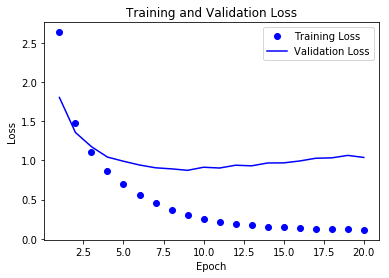

In [40]:
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

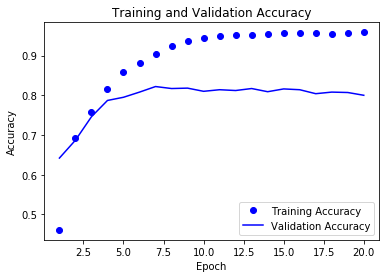

In [41]:
plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [42]:
results = model.evaluate(x_test, one_hot_test_labels)

2246/2246 [==============================] - 0s 160us/step


In [44]:
print("Test Set Loss: ", results[0])
print("Test Set Accuracy: ", results[1])

Test Set Loss:  1.1791877353817675
Test Set Accuracy:  0.7862867320210193


Generating Predictions on New Data

In [45]:
predictions = model.predict(x_test)

In [47]:
#Each entry in the predictions matrix is a 46 by 1 vector giving softmax proba of each class
predictions

array([[1.6951240e-07, 4.3864475e-07, 1.0839186e-09, ..., 1.2349032e-08,
        3.5098188e-10, 1.7455031e-08],
       [5.4272622e-02, 1.8304393e-02, 5.7595188e-04, ..., 9.3275014e-07,
        1.0615635e-05, 4.2297092e-06],
       [7.1638219e-02, 5.7178545e-01, 7.1587536e-04, ..., 7.4912317e-04,
        3.1641362e-06, 3.6131245e-05],
       ...,
       [1.6878641e-06, 7.6173646e-06, 4.7885931e-07, ..., 9.8647820e-07,
        2.1753496e-07, 4.2331467e-07],
       [3.5867400e-02, 1.4788027e-01, 3.6527615e-03, ..., 1.1880328e-03,
        5.1829190e-04, 1.0508893e-03],
       [2.9052058e-04, 8.6353487e-01, 4.0654861e-03, ..., 1.7404764e-04,
        1.4749109e-07, 6.1496692e-08]], dtype=float32)

In [50]:
print("Prediction for the first instance in the test set: ", np.argmax(predictions[0]))

Prediction for the first instance in the test set:  3


Using Sparse Categorical Crossentropy Loss to Avoid One Hot Encoding

In [51]:
#Rather than one-hot encoding the target vector, we can simply use the sparse categorical cross entropy
#It will take care of one-hot encoding itself so we can pass an integer target vector

y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [52]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [53]:
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [62]:
history = model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512, validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 171us/step - loss: 0.0747 - acc: 0.9598 - val_loss: 1.4153 - val_acc: 0.7840
Epoch 2/9
7982/7982 [==============================] - 1s 178us/step - loss: 0.0765 - acc: 0.9582 - val_loss: 1.4836 - val_acc: 0.7780
Epoch 3/9
7982/7982 [==============================] - 2s 197us/step - loss: 0.0743 - acc: 0.9608 - val_loss: 1.4233 - val_acc: 0.7790
Epoch 4/9
7982/7982 [==============================] - 2s 203us/step - loss: 0.0763 - acc: 0.9578 - val_loss: 1.4549 - val_acc: 0.7870
Epoch 5/9
7982/7982 [==============================] - 1s 176us/step - loss: 0.0732 - acc: 0.9592 - val_loss: 1.4940 - val_acc: 0.7670
Epoch 6/9
7982/7982 [==============================] - 1s 173us/step - loss: 0.0721 - acc: 0.9595 - val_loss: 1.4092 - val_acc: 0.7940
Epoch 7/9
7982/7982 [==============================] - 1s 175us/step - loss: 0.0751 - acc: 0.9580 - val_loss: 1.4783 - val_acc: 0.7730
Epoch 8

In [63]:
loss = history.history['loss']
val_loss = history.history['val_loss']

acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(loss) +1)

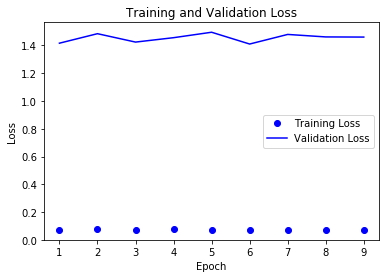

In [64]:
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

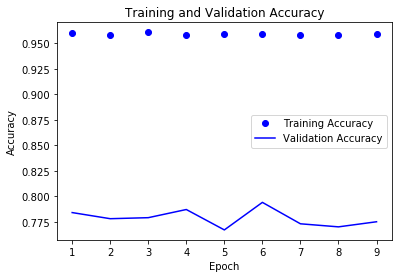

In [65]:
plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()